In [43]:
import numpy as np
import ode
import matplotlib.pyplot as plt

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_probability as tfp
from tensorflow import keras


In [44]:
#X is the system state vector 
#the function takes as input a start time t and the assocate system state vector at t 
#function computes dX
def lotka_volterra(t, X):
    #data init 
    x_1, x_2 =X
    #set constants  
    a=1.3
    b=0.9
    c=0.8
    d=1.8
    #system of ODE
    dX=np.array([
        a*x_1-b*x_1*x_2,
        c*x_1*x_2-d*x_2
    ])
    return dX
#output is an array with two entries dx and ddy computed at dt 

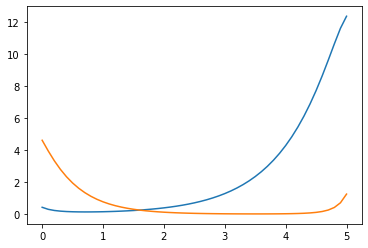

In [45]:
#first arg is the function whose output is the ode system,
#next are the initial conditions, start/end times, timestep 
#returns t and X for each iteration where t is the iteration and X is an array
et, ex = ode.euler(lotka_volterra, [0.44249296, 4.6280594], [0,5], 0.1)
ex1, ex2=ex 

#same init, returns t and x
bet, bex = ode.backwardeuler(lotka_volterra, [0.44249296, 4.6280594], [0,5], 0.1)
bex1, bex2,= bex

time=np.arange(0,5.1,0.1)
plt.plot(time,ex1)
plt.plot(time,ex2)


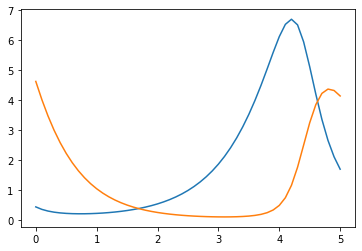

In [46]:
plt.plot(time,bex1)
plt.plot(time,bex2)


In [47]:
#try another ODE solver 
t_init=0
times= np.arange(0, 20.1, 0.1)
results = tfp.math.ode.BDF().solve(lotka_volterra, t_init, [0.44249296, 4.6280594], solution_times=times)



In [48]:
len(results)

4

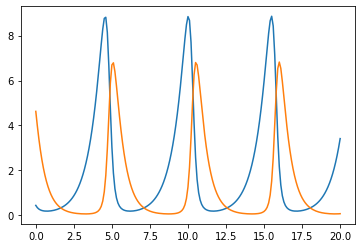

In [49]:
plt.plot(times,results[1][0])
plt.plot(times,results[1][1])


In [50]:
#Next, store this data as the Dataset 
N_x=results[1][0]
N_y=results[1][1]
N=len(results[1][0])
N_x=N_x.numpy()
N_x=N_x.tolist()

N_y=N_y.numpy()
N_y=N_y.tolist()


In [51]:
#define the function as a neural network ie dX now computed via NN
'''def lotka_volterra_nn(t, X):
    #data init 
    x_1, x_2 =X
    data=np.array([[x_1, x_2]])
    model = keras.Sequential([
    keras.layers.Dense(2),    
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2)
])
    dX=model(data)
    dX=dX.numpy()
    dX=dX.tolist()
    return dX
'''

"def lotka_volterra_nn(t, X):\n    #data init \n    x_1, x_2 =X\n    data=np.array([[x_1, x_2]])\n    model = keras.Sequential([\n    keras.layers.Dense(2),    \n    #keras.layers.Flatten(input_shape=(28, 28)),\n    keras.layers.Dense(32, activation='relu'),\n    keras.layers.Dense(2)\n])\n    dX=model(data)\n    dX=dX.numpy()\n    dX=dX.tolist()\n    return dX\n"

In [52]:
model = keras.Sequential([
    keras.layers.Dense(2),    
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2)
])

In [53]:
def lotka_volterra_nn(t, X):
    #data init 
    x_1, x_2 =X
    data=np.array([[x_1, x_2]])
    dX=model(data)
    dX=dX.numpy()
    dX=dX.tolist()
    return dX

In [54]:
#Use the ODE solver to compute X from dX
t_init=0
times= np.arange(0, 20.1, 0.1)
nn_results = tfp.math.ode.BDF().solve(lotka_volterra, t_init, [0.44249296, 4.6280594], solution_times=times)
nn_results


Results(times=<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 1

In [55]:
#next use the MSE in order to compute new weights i.e. update model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error,
              metrics=['accuracy'])
#model.fit(train_images, train_labels, epochs=10)

In [56]:
model = keras.Sequential([
    keras.layers.Dense(2),    
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2)
    
])

#next use the MSE in order to compute new weights i.e. update model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error, 
              metrics=['accuracy'])
#N is the size of the training set

#for i in range(N):
for i in range(2):   
    #Use the ODE solver to compute X from dX
    t_init=0
    times= np.arange(0, 20.1, 0.1)
    nn_results = tfp.math.ode.BDF().solve(lotka_volterra, t_init, [0.44249296, 4.6280594], solution_times=times)
    
    out_x=results[i][0].numpy()
    out_y=results[i][1].numpy()

    out_x=out_x.tolist()
    out_y=out_y.tolist()
    
    
    train_label=np.array([N_x[i], N_y[i]])
    train_data=np.array([out_x[i], out_y[i]])

    model.fit(train_data, train_label, epochs=10)


TypeError: 'float' object is not subscriptable